In [96]:
## Import packages  
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [97]:
## Making data frame  
df = pd.read_csv("data/datasets_623780_1120494_Alcohol_Sales.csv")

In [98]:
## iterating the columns 
for col in df.columns: 
    print(col) 

DATE
S4248SM144NCEN


In [99]:
## Change column name 
df = df.rename(columns = {"S4248SM144NCEN":"Sale"}) 

In [100]:
## Calling head() method 
df.head()

,DATE,Sale
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [101]:
## Sort by Date
df[sorted(df.columns)]

,DATE,Sale
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [102]:
## Min / Max value of Sale
df['Sale'].min(), df['Sale'].max()

(3031, 15504)

In [103]:
## Check NAs
df['Sale'].isnull().sum()

0

In [104]:
## Sum sale by year-month
df.index = pd.to_datetime(df['DATE'], format='%Y/%m/%d')
sum_sale = df.groupby(by=[df.index.year, df.index.month]).sum()
sum_sale.head()

Sale
DATE DATE      
1992 1     3459
     2     3458
     3     4002
     4     4564
     5     4221

In [105]:
## Indexing with time series data
date = df.set_index('DATE')
date.index

Index(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01', '1992-05-01',
       '1992-06-01', '1992-07-01', '1992-08-01', '1992-09-01', '1992-10-01',
       ...
       '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
       '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'],
      dtype='object', name='DATE', length=325)

In [106]:
## Use sales data as y
y = df['Sale']

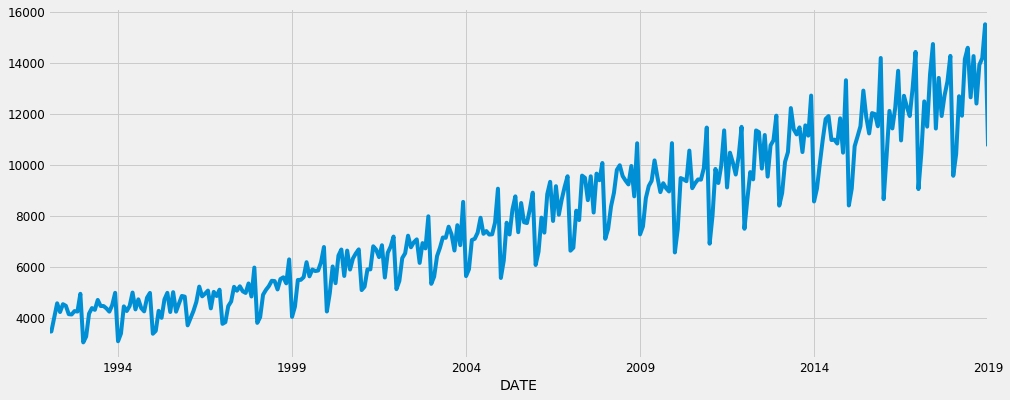

In [107]:
## Visualizing sales time series data
y.plot(figsize = (15, 6))
plt.show()

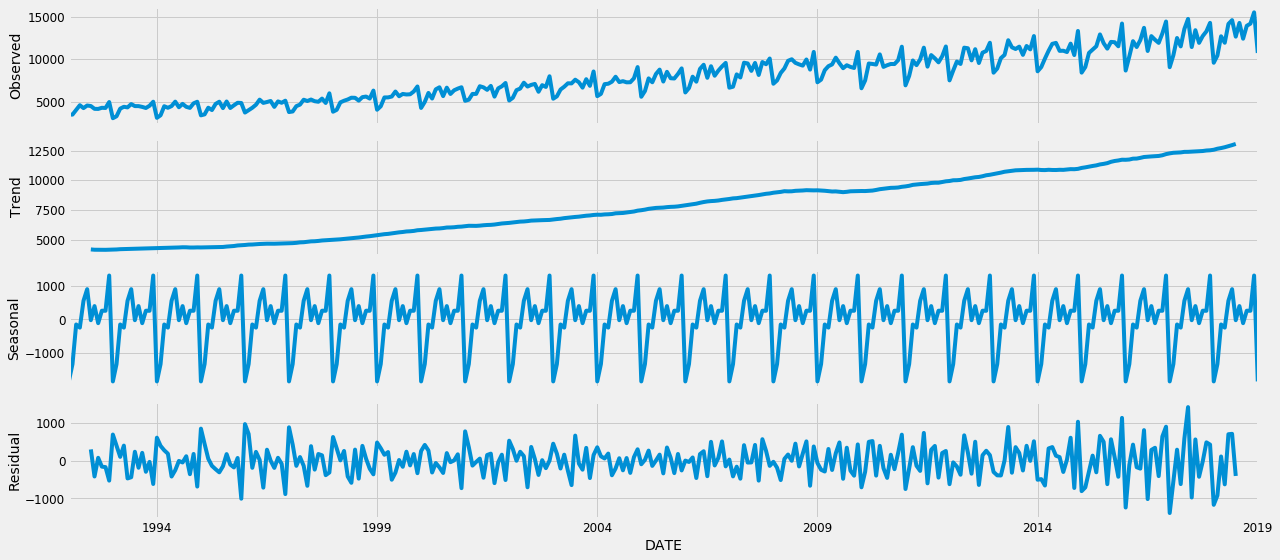

In [108]:
## We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [109]:
# Time series forecasting with ARIMA
## ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [110]:
## This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. 
## Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:6778.09107027246
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6331.963317842457
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4809.545082533588
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4578.7143726443155
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4653.648596046325
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4639.42056992936
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4576.885697632243
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4511.32369355855
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6407.57219425046
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:5811.412568788923
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4765.120862921576
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:4548.150294896963
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:4653.286169497094
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4629.710601331644
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4572.305201174215
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:4492.813969560848
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:5563.732974803579
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:5074.965539063596
ARIMA(0, 1, 0

In [ ]:
## The above output suggests that SARIMAX(1, 1, 1)x(1, 1, 1, 12) yields the lowest AIC value of 4378.38. Therefore we should consider this to be optimal option.

In [111]:
## Fitting the ARIMA model
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3652      0.062     -5.893      0.000      -0.487      -0.244
ma.L1         -0.7453      0.045    -16.544      0.000      -0.834      -0.657
ar.S.L12      -0.0409      0.062     -0.654      0.513      -0.163       0.082
sigma2      1.511e+05   1.09e+04     13.909      0.000     1.3e+05    1.72e+05


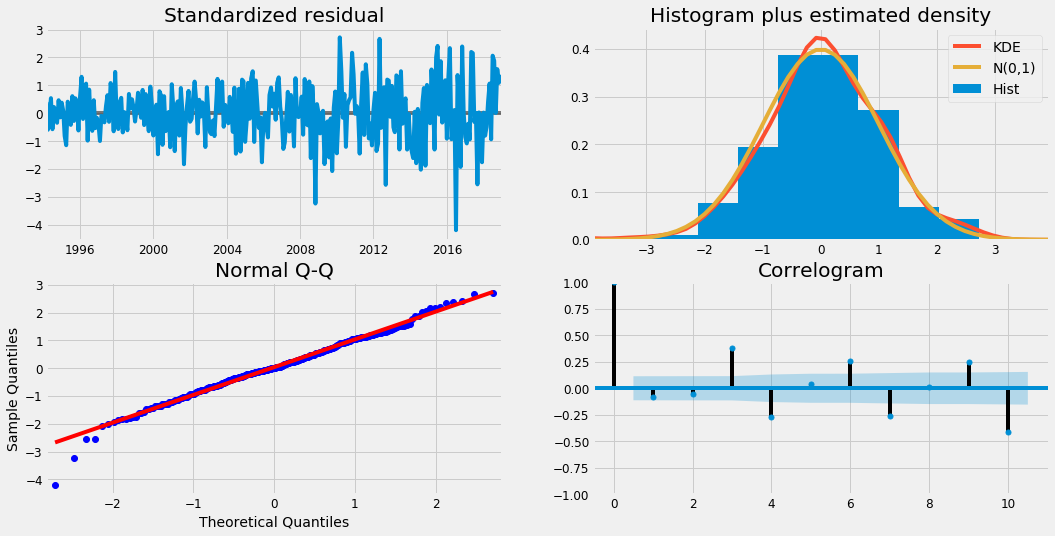

In [112]:
## We should always run model diagnostics to investigate any unusual behavior
results.plot_diagnostics(figsize=(16, 8))
plt.show()
## It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed

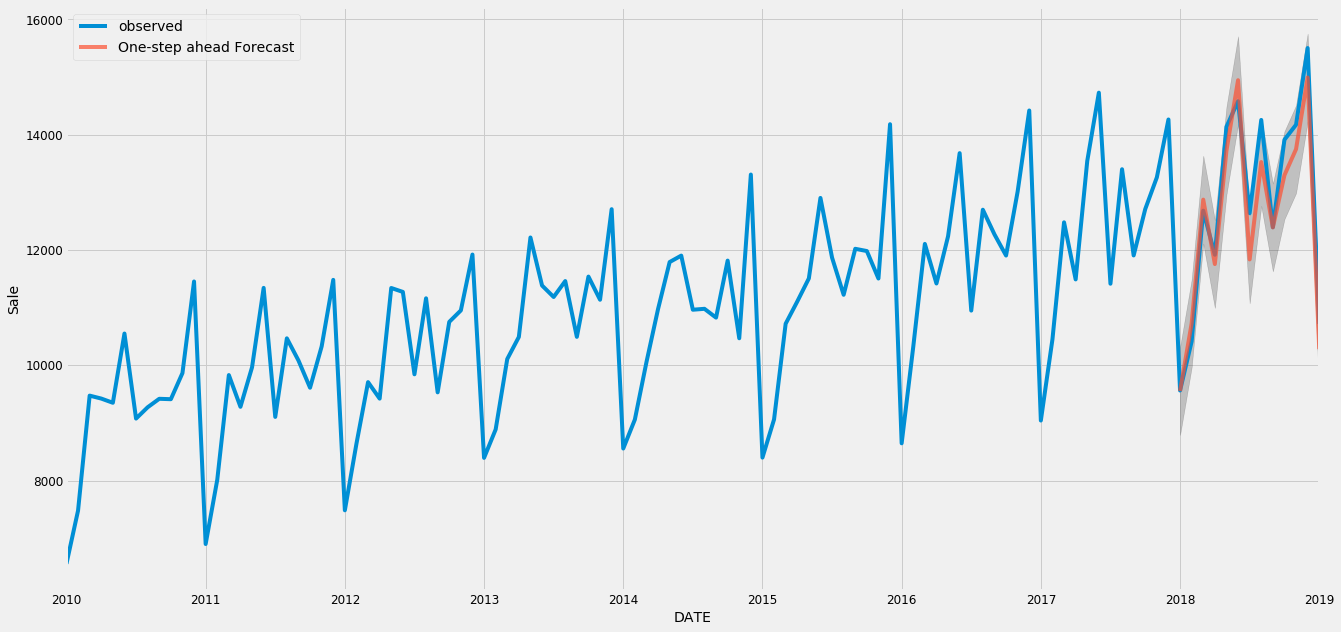

In [132]:
## Validating forecasts
## To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2019–01–01 to the end of the data
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2010-01-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(20, 10))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('DATE')
ax.set_ylabel('Sale')
plt.legend()
plt.show()

In [134]:
## The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, 
## showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.
y_forecasted = pred.predicted_mean
y_truth = y['2018-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 203939.27
The Root Mean Squared Error of our forecasts is 451.6


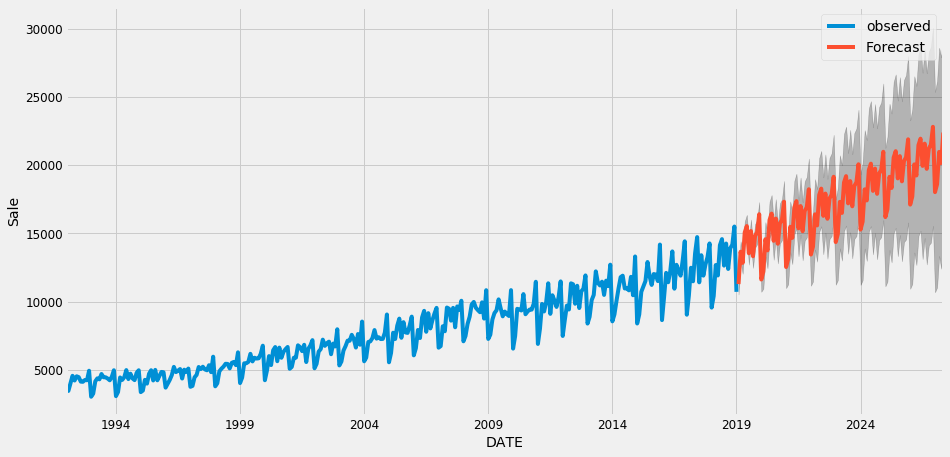

In [135]:
## Producing and visualizing forecasts
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('DATE')
ax.set_ylabel('Sale')
plt.legend()
plt.show()